In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\itxme\Desktop\Week 1\Datasets\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.shape

(11162, 17)

In [8]:
# Data Preprocessing
# 1. Handle missing values (if any)
print("Missing values before handling:")
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

Missing values before handling:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


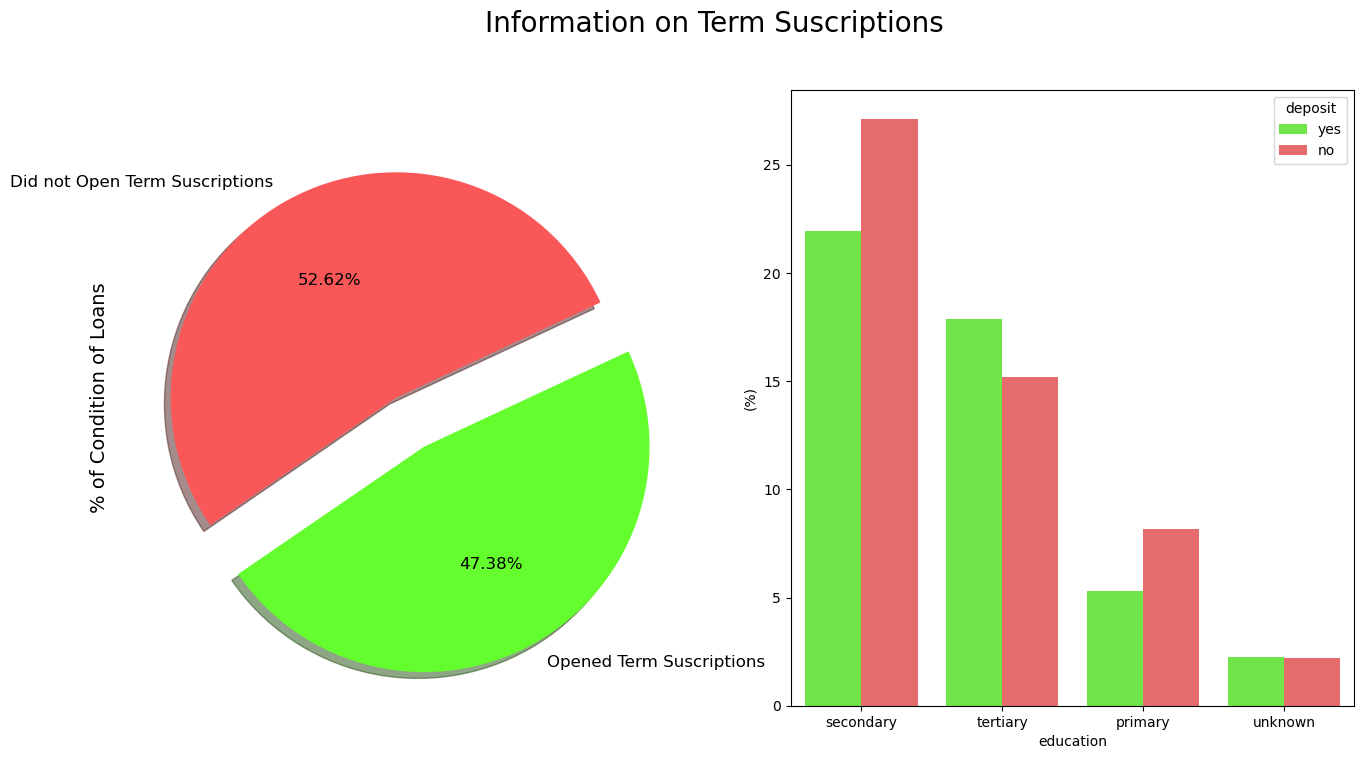

In [9]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

C:\Users\itxme\AppData\Local\Temp\ipykernel_11620\3147521270.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


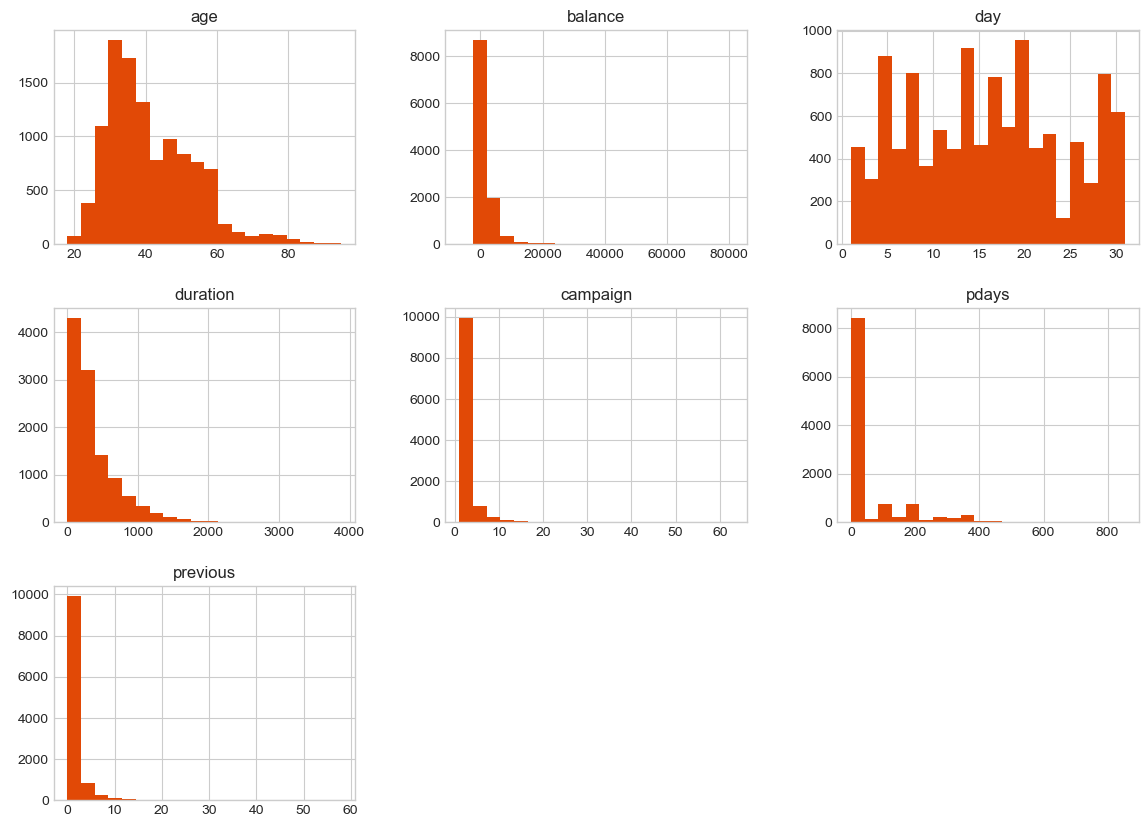

In [10]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [11]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [12]:
# 2. Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
# 3. Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
# Separate features and target
X = df.drop('deposit', axis=1)
y = df['deposit']


In [15]:

# Feature Selection
# Using SelectKBest with mutual information
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [16]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top selected features:")
print(selected_features)

Top selected features:
Index(['age', 'job', 'balance', 'housing', 'contact', 'month', 'duration',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [18]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for model_name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-validation accuracy: {cv_scores.mean():.2f}")
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Test Metrics:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    
    results.append((model_name, accuracy, precision, recall, f1))


Logistic Regression Cross-validation accuracy: 0.78
Logistic Regression Test Metrics:
Accuracy: 0.77, Precision: 0.78, Recall: 0.73, F1-Score: 0.75

Decision Tree Cross-validation accuracy: 0.77
Decision Tree Test Metrics:
Accuracy: 0.77, Precision: 0.76, Recall: 0.74, F1-Score: 0.75

Random Forest Cross-validation accuracy: 0.84
Random Forest Test Metrics:
Accuracy: 0.83, Precision: 0.81, Recall: 0.84, F1-Score: 0.82


In [19]:
# Summarize Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.773399   0.784195  0.725398  0.753651
1        Decision Tree  0.765338   0.761813  0.740394  0.750951
2        Random Forest  0.827586   0.808877  0.836926  0.822662


In [20]:
# Feature Importance Analysis for Random Forest
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [21]:

print("\nFeature Importance (Random Forest):")
print(importance_df)


Feature Importance (Random Forest):
    Feature  Importance
6  duration    0.415550
2   balance    0.122710
0       age    0.108359
5     month    0.105895
7     pdays    0.052904
1       job    0.051366
4   contact    0.050334
9  poutcome    0.034301
3   housing    0.032568
8  previous    0.026013


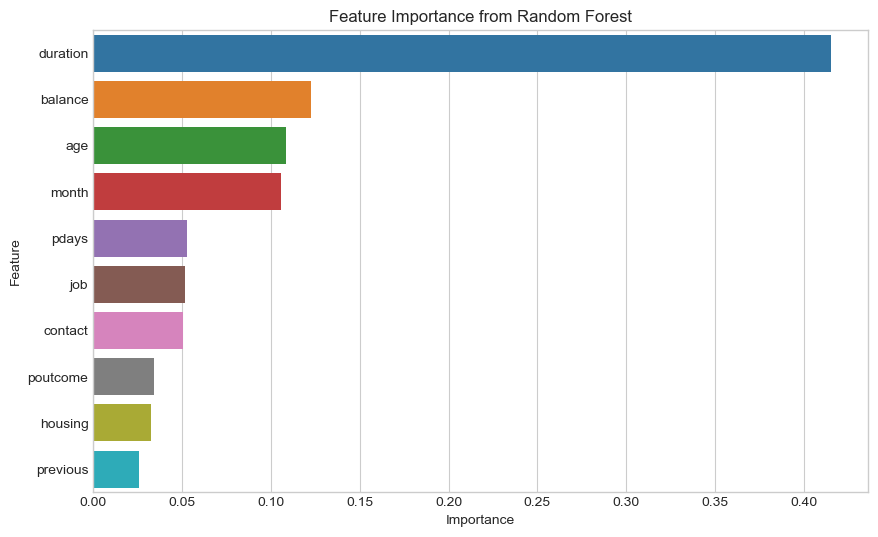

In [22]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()